# Showcase Notebook for Usage Examples

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Import Project and Cluster Methods

DEBUG:root:data_generating.Run_data_generating started main
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
DEBUG:root:data_generating.Run_data_generating finished main
DEBUG:root:model_training.Run_model_training started main
ERROR:root:Model training process failed with the following error message:
ERROR:root:[Errno 2] No such file or directory: 'data/Dec-12-2020/snippets'

Number train examples: 212
Number test examples: 0


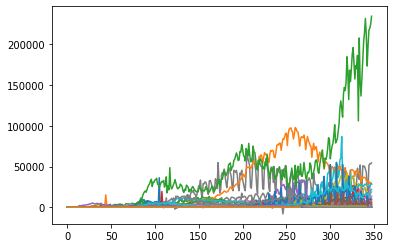

Number zero entries: 19188 Proportion: 0.3127475429074373
Total number entries: 61353
mean: 1146.345166495526
varianz: 44853161.96660977
quantiles (10%, 20% ...): [0.0, 0.0, 0.0, 4.0, 15.0, 50.0, 153.0, 464.0, 1479.0, 234633.0]
four quantiles: [0.0, 15.0, 271.0, 234633.0]
Number of negative values: 17
Negative values: [-209, -2461, -1480, -50, -8261, -766, -148, -6, -110, -105, -1385, -161, -9, -713, -372, -115, -1]


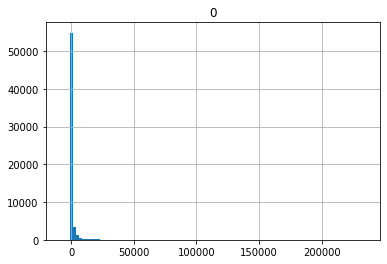

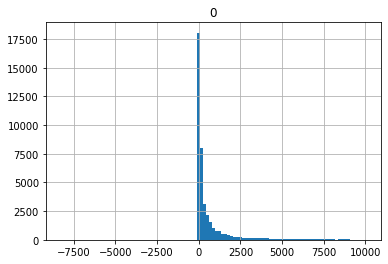

In [2]:
import data_generation_visual
import src.model_training.clusters as cl 

### Load Examples

In [3]:
import os
PROJECT_PATH = os.getcwd().replace("notebooks", "")
DATA_GEN_FOLDER_NAME = "Dec-12-2020"
EXAMPLES_DATASET_PATH = PROJECT_PATH + "data/" + DATA_GEN_FOLDER_NAME + "/total_snippets"
examples = data_generation_visual.load_Examples_from_file(EXAMPLES_DATASET_PATH)
examples.add_padding()

#### Short Test output to check wether data is OK

In [4]:
test_example = examples.train_data[0]
print(f"Time Series shortened: \n{test_example.time_series[:100]},\n\
Time Series size: {test_example.time_series.shape[0]},\n\
Country: {test_example.country},\n\
Continent: {test_example.continent}")

Time Series shortened: 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  3.  3.  3.  6.  5.  1.  0.  0.  2.  0. 10.  6.  2. 33.  0. 16. 15.
  8. 27. 25. 26. 43.  0. 35. 29. 38. 30.],
Time Series size: 348,
Country: Afghanistan,
Continent: Asia


### TSLearn KShape Example

[]

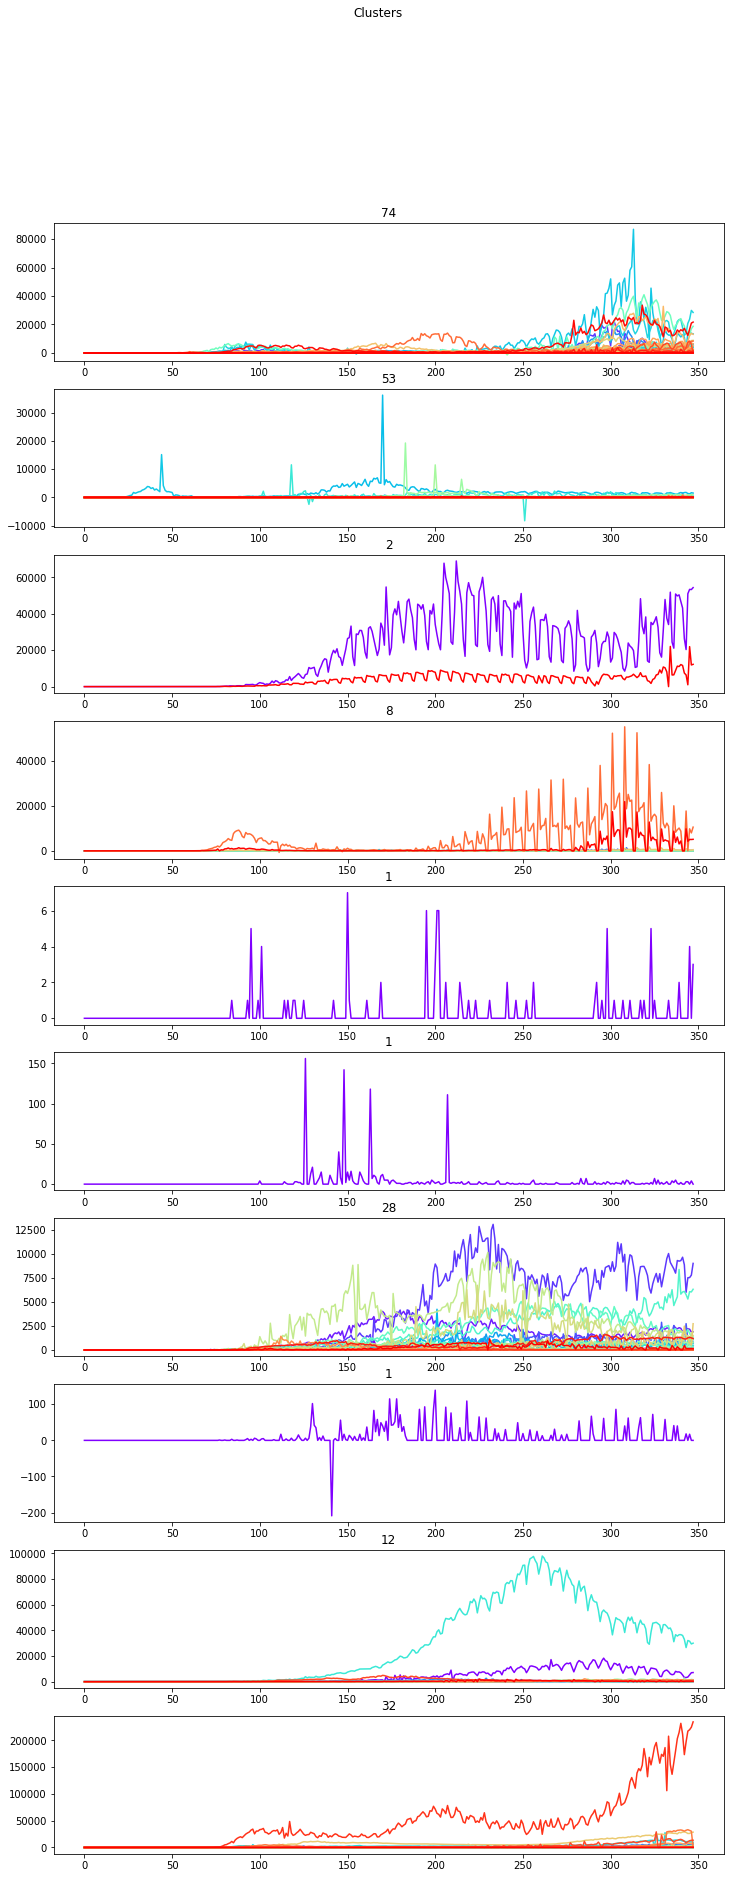

In [5]:
n_clusters = 10
model = cl.TS_KShape(n_clusters).fit(examples)

model.plot_cluster().plot()

### SK_extra KMedoids Example

[]

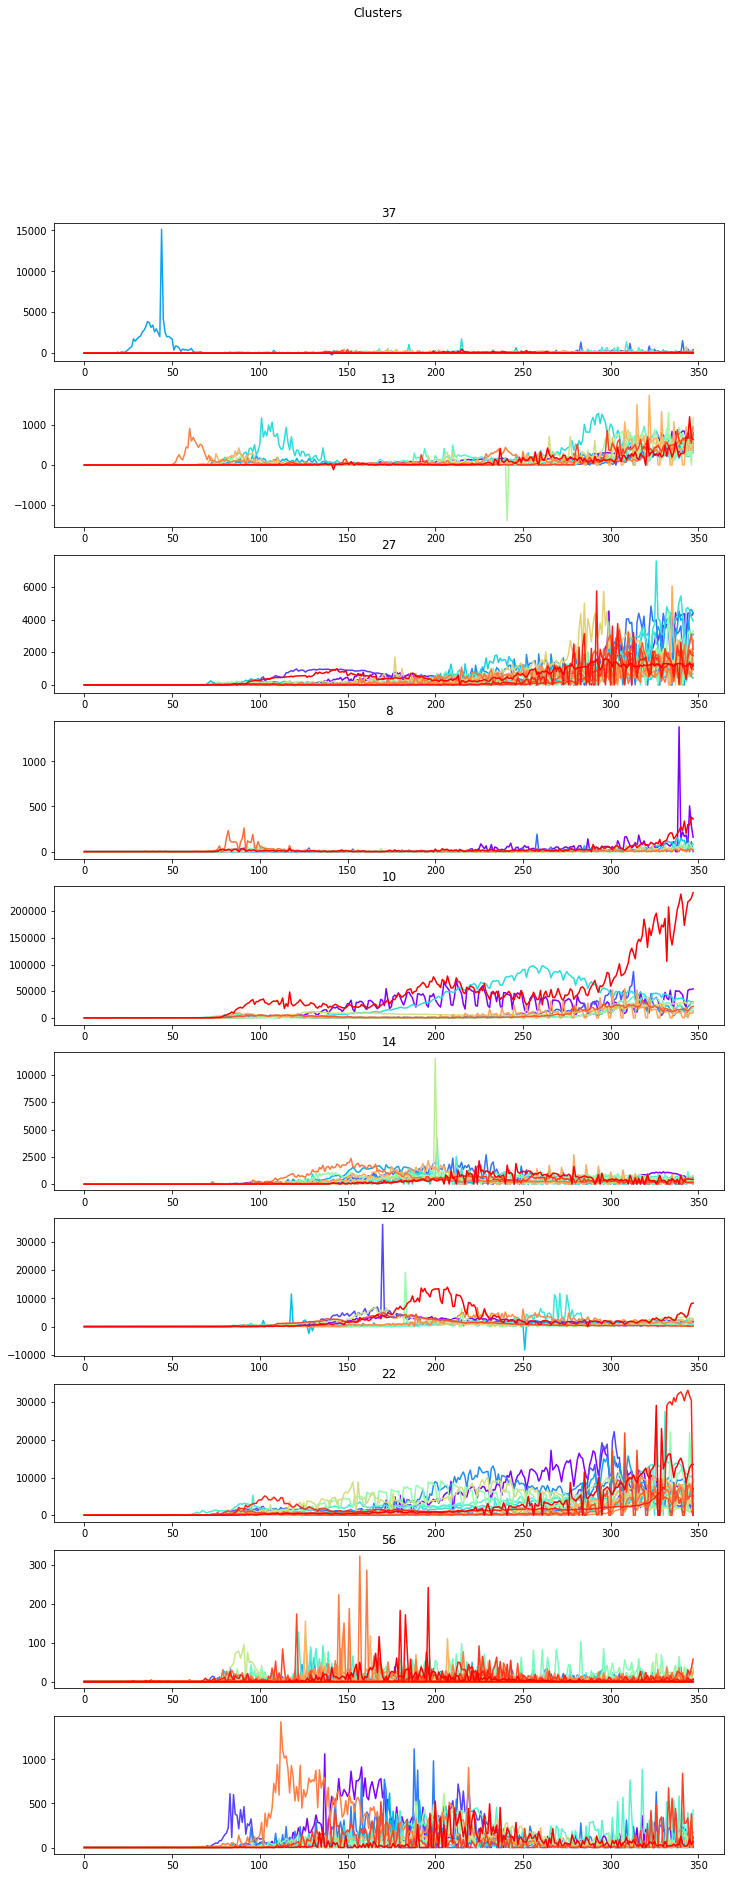

In [6]:
n_clusters = 10
model = cl.KMedoids(n_clusters, metric='euclidean').fit(examples)

model.plot_cluster().plot()

### DBSCAN Clustering Example

In [7]:
model = cl.DBSCAN(2, 'dtw').fit(examples)

model.plot_cluster().plot()

ValueError: Expected 2D array, got scalar array instead:
array=None.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.